# Números Aleatorios
En la unidad anterior se describio como primer paso de los experimentos de simulación, la selección de una fuente de números aleatorios y la obtención de los mismos. Por lo tanto, disponer de un buen generador de números aleatorios es fundamental en Simulación. De hecho, constituye también una parte fundamental en otras áreas, como la Informática (algoritmos aleatorizados, verificación de algoritmos, complejidad de algoritmos, criptografía, ...), la Estadística (métodos de muestreo y remuestreo, contrastes Montecarlo, Inferencia Bayesiana, ...), y, en general, en cualquier problema de cálculo científico que, de manera directa o indirecta, incluya algún elemento probabilístico incluyendo los juegos de video.

## ¿Porqué estudiar generadores de números aleatorios?

Actualmente existen multiples generadores de números aleatorios en diferentes entornos y compiladores lo cual supondría para un usuario de la Simulación que no es necesario su estudio. Sin embargo, estudios sobre algunos generadores comerciales sugieren que debemos actuar con cuidado con el uso de ellos. Incluso, el uso progresivo de modelos de simulación cada vez más detallados exige generadores de números aleatorios de mayor calidad.

## ¿Cómo determinar si un generador de numeros aleatorios es apropiado?

## Pruebas o contrastes empíricos

Normalmente, pasaremos un conjunto de pruebas cuando introduzcamos un nuevo generador, o cuando deseamos analizar si un generador del que desconozcamos su algoritmo subyacente es suficientemente bueno para nuestros propósitos.


# Constraste o prueba de Kolmogorov-Smirnov

Consideramos el caso en que $F_0$ es continua. La función de distribución empírica de una muestra $X_1, X_2,...,X_n$ se define como:

$$F_n(x)=\frac{\#\{X_{i}\leq x\}}{n}$$

Bajo la hipótesis nula $H_0:F_X(x)=F_0(x)$, esperamos que $F_n$ se aproxime a $F_0$. Definimos el estadístico bilateral de Kolmogorov-Smirnov

$$D_{n}=\underset{x\in\mathbb{R}}{\sup}\left|F_{n}(x)-F_{0}(x)\right|$$

La distribución exacta de $D_n$ está tabulada para valores seleccionados de $n\leq40$ y del nivel de significación $\alpha$. Para muestras grandes, se utiliza la distribución asintótica de $D_n$, que viene dada, para todo $z\leq0$, por

$$\underset{n\rightarrow\infty}{\lim}P(\sqrt{n}D_{n}\leq z)=L(z)=1-2\overset{\infty}{\underset{i=1}{\sum}}(-1)^{i-1}e^{-2i^{2}z^{2}}$$

$L(z)$ está tabulada y se comprueba que la aproximación es suficientemente buena para $n\geq35$. Intuitivamente, esperamos que $D_n$ sea pequeño cuando la hipótesis nula es cierta.
En nuestro caso particula de aleatoriedad, si $X_{(1)}<X_{(2)}<...<X_{(n)}$ designa al estadístico de orden, $F_0(x_{(i)})=x_{(i)}$, y como $F_n(x_{(i)})=i/n$, resulta:

$$D_{n}=\underset{i\leq i\leq n}{\max}\left\{ \max\left[\left|\frac{i}{n}-x_{(i)}\right|,\left|x_{(i)}-\frac{i-1}{n}\right|\right]\right\}$$



<img src="imgs/300px-KS_Example.png" width="30%" height="30%" >
<center>Figura. Ilustración del estadístico de Kolmogorov–Smirnov (K–S). La línea roja es una función de distribución acumulada (cumulative distribution function, CDF), la línea azul es una función empirica de distribución acumulada (empirical cumulative distribution function, ECDF), y la línea negra es el estadístico K–S. Imagen tomada de Wikipedia [https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test]</center>


## Ejemplo

In [50]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

N = 100

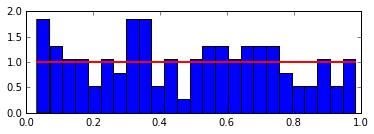

('De = ', 0.24826818776844084)


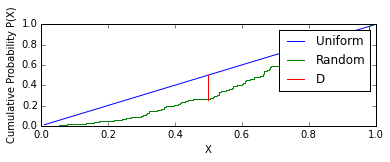

('D = ', 0.24826818776844062)
('p-value = ', 6.4652544680132706e-06)


In [51]:
def grafico(x):
    
    plt.subplot(2,1,1)
    count, bins, ignored = plt.hist(x, 25, normed=True)
    plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
    plt.show()
    
    plt.subplot(2,1,2)
    x1 = np.arange(1/float(N),1+1/float(N),1/float(N))
    y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

    x2 = np.sort(x)
    y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))

    De=np.absolute(y2-y1)
    #print(D)
    print("De = ",np.max(De))

    # Plotting
    plt.plot(x1,y1,label='Uniform')
    plt.step(x2,y2,label='Random')
    x3 = [x1[De.argmax()],x1[De.argmax()]]
    y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
    plt.step(x3,y3,label='D')

    #plt.plot(x1,De,label='De')

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Cumulative Probability P(X)')
    #plt.title('arbitrary')
    #plt.xscale('log')
    #plt.yscale('log')

    #plt.xlim(0, np.max([np.max(whitney),np.max(redwell)])+0.05)
    plt.ylim(0, 1)

    plt.show()
    
    from scipy import stats
    D,pvalue = stats.kstest(y2, 'uniform')
    print("D = ", D)
    print("p-value = ", pvalue)

#Generador Numpy
u = [1.0] * N    
x = np.random.uniform(0,1,N)
grafico(x)

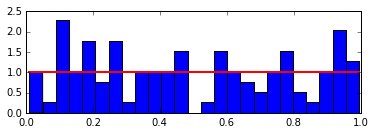

('De = ', 0.27052585107426691)


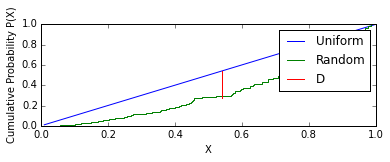

('D = ', 0.27052585107426669)
('p-value = ', 5.9073688407629277e-07)


In [52]:
def aleatorios(al,a,b,m):
    xo=al
    ga=[]
    aa=a
    bb=b
    mm=m
    for i in range(N):
        mod=(aa*xo+bb)%mm
        ui=float(mod)/mm
        xo=mod
        ga.append(ui)
    #print(ga)
    return ga
##Generador 
xa=aleatorios(21,223,23,829)
grafico(xa)



### Generador RanduX

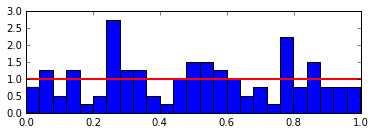

('De = ', 0.23948221970163636)


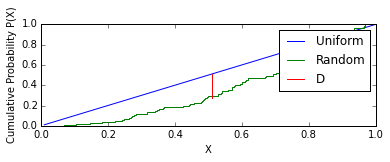

('D = ', 0.23948221970163613)
('p-value = ', 1.5665459268676685e-05)


In [53]:
xb=aleatorios(21,65539,0,(2**31))
grafico(xb)

### Generador Sinclair

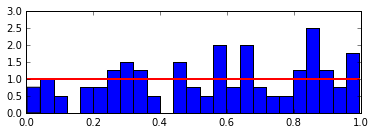

('De = ', 0.21454773300891317)


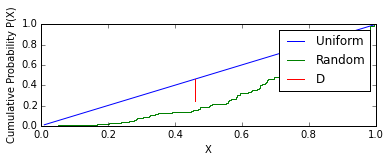

('D = ', 0.21454773300891294)
('p-value = ', 0.0001610988230476007)


In [54]:
xc=aleatorios(21,75,0,(2**16)+1)
grafico(xc)

### Generador Numerical reciepes

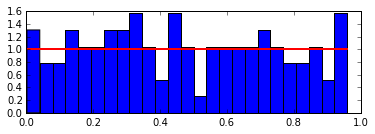

('De = ', 0.25461458214365507)


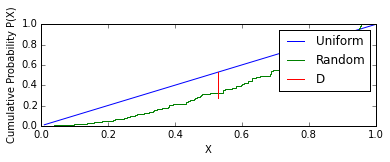

('D = ', 0.25461458214365484)
('p-value = ', 3.3410624418195312e-06)


In [42]:
xd=aleatorios(21,1664525,1013904223,(2**32))
grafico(xd)

### Generador Borland

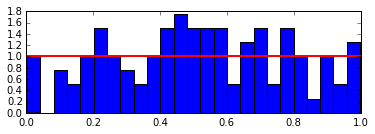

('De = ', 0.20871530542543343)


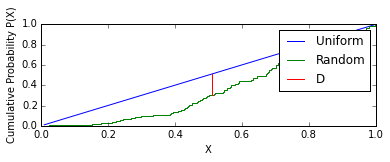

('D = ', 0.20871530542543321)
('p-value = ', 0.00026742487145980931)


In [43]:
xe=aleatorios(21,22695477,1,(2**32))
grafico(xe)

### Contraste o prueba  $\chi^{2}$

La prueba $\chi^{2}$ es de bondad de ajuste. Es poco potente, por lo que permite justificar el rechazo de una hipótesis, pero proporciona escaso soporte a su aceptación. El problema de bondad de ajuste se plantea como sigue. Tenemos una muestra $X_1, X_2,...,X_n$ de una población con distribución $F_X(x)$ desconocida. Deseamos contrastar la hipótesis nula $H_0:F_X(x)=F_0(x)$, para todo $x\in\mathbb{R}$, donde $F_0(x)$ está completamente especificada, frente a la alternativa $H_1:F_X(x) \neq F_0(x)$ para algún $x$.
Para realizar el contraste, partimos el soporte de $X$ en $k$ subconjuntos o clases mutuamente excluyentes. Para cada subconjunto $i$, $i=1,...,k$, calculamos el número $f_i$ de observaciones que caen en la clase y el numero esperado de observaciones $e_i$ bajo la distribución hipotética $F_0$. El estadístico de la prueba es:

$$\chi^{2}=\overset{k}{\underset{i=1}{\sum}}\frac{(f_{i}-e_{i})^{2}}{e_{i}}$$

cuya distribución asintótica es una $\chi_{k-r-1}^{2}$, donde $r$ es el número de parámetros que se estiman a partir de las observaciones. La aproximación se considera aceptada si $\min\left\{ e_{i}>5\right\}$. Intuitivamente, el estadístico tiende a ser pequeño bajo la hipótesis nula, y grande cuando ésta es falsa, con lo qu ese deduce inmediatamente un contraste de hipótesis. La potencia del contraste crece con el número $k$ de subconjuntos considerados.

En nuestro problema de aleatoriedad, $F_0$ es la función de distribución de la uniforme en [0,1], con lo que $r=0$. Además, pueden cogerse $k$ subintervalos de [0,1] de igual longitud, con lo que $e_i=n/k$.


In [44]:
k=10
ei=N/float(k)
xk=[]
dfi=[]
f=1/float(k)

def fi(y):
    cont=[]
    gal=y
    xr=0
    for i in range(k):
        xr=f+xr
        xk.append(xr)
        cont.append(0)
    #print xk
    for i in range(N):
        for j in range(k):
            if(gal[i]<=xk[j]):
                cont[j]=cont[j]+1
                break
    return cont
    print cont
print " Datos Generador Propio ",fi(xa)
ixa=fi(xa)
def valorest(v):
    ix=v
    l=0
    for i in range(k):
        xchi=(ix[i]-ei)**2/float(ei)
        l=l+xchi
    return l
print " Valor Estadistico ",valorest(ixa)

 Datos Generador Propio  [7, 17, 11, 8, 11, 7, 8, 12, 3, 16]
 Valor Estadistico  16.6


In [45]:
print "Datos Generador Numpy",fi(x)
ixa=fi(x)
print " Valor Estadistico: ",valorest(ixa)

Datos Generador Numpy [11, 11, 15, 6, 6, 12, 10, 12, 9, 8]
 Valor Estadistico:  7.2


In [46]:
print " Datos Generador RaNDUx ",fi(xb)
ixa=fi(xb)
print " Valor Estadistico: ",valorest(ixa)

 Datos Generador RaNDUx  [9, 7, 15, 10, 10, 13, 6, 12, 10, 8]
 Valor Estadistico:  6.8


In [47]:
print " Datos Generador Sinclair ",fi(xc)
ixa=fi(xc)
print " Valor Estadistico: ",valorest(ixa)

 Datos Generador Sinclair  [8, 4, 12, 9, 6, 13, 14, 6, 16, 12]
 Valor Estadistico:  14.2


In [48]:
print " Datos Generador NumericalS ",fi(xd)
ixa=fi(xd)
print " Valor Estadistico: ",valorest(ixa)

 Datos Generador NumericalS  [10, 11, 11, 14, 10, 7, 11, 10, 9, 7]
 Valor Estadistico:  3.8


In [49]:
print " Datos Generador Borland ",fi(xe)
ixa=fi(xe)
print " Valor Estadistico: ",valorest(ixa)

 Datos Generador Borland  [5, 8, 13, 5, 18, 14, 10, 11, 6, 10]
 Valor Estadistico:  16.0


# Constraste o prueba de rachas

Dada la sucesión de observaciones $X_1, X_2,...,X_n$, construimos la sucesión de simbolos binarios definida mediante 1 si $X_i<X_{i+1}$, 0 si $X_i>X_{i+1}$. Definimos  racha creciente (decreciente) de longitud $l$ a un grupo seguido de $l$ números 1 (ó 0). Contabilizamos el número de rachas. Sabemos que su distribución asintótica, bajo la hipótesis nula de aleatoriedad, es:

$$N\left(\frac{2n-1}{3},\frac{16n-29}{90}\right)$$

Intuitivamente, rechazamos la aleatoriedad con un número muy pequeño o muy grande de rachas. De ahí se obtiene inmediatamente la prueba.

### Contraste de rachas por encima y por debajo de la mediana

Otro procedimiento para definir rachas se tiene del recuento de observaciones que se sitúan a un mismo lado de la mediana. La distribución asintótica del número de rachas, bajo la hipótesis de aleatoriedad, es:

$$N\left(1+\frac{n}{2},\frac{n}{2}\right)$$

de donde se sigue, inmediatamente una prueba.

### Contraste o prueba de permutaciones

Separamos las observaciones en $k$-uplas:

$$(U_1,U_2,...,U_k),...,(U_{ik+1},U_{ik+2},...,U_{(i+1)k}),...$$

La $k$-upla general se escribe:

$$(U_{ik+j})_{j=1}^k$$

La ordenamos crecientemente y consideramos la ordenación correspondiente de los subíndices $j$. Bajo la hipótesis de que la probabilidad de que dos números sean iguales es nula, hay $k!$ ordenaciones posibles. Bajo la hipótesis de independencia, todas las permutaciones son equiprobables, con probabilidad $1/k!$. Entonces es inmediato aplicar una prueba $\chi^2$ con $k!$ clases, distribución asintótica $\chi_{k!-1}^2$, frecuencias esperadas $r/k!$, onde $r$ es el número de $k$-uplas y frecuencias observadas el número de veces que aparece cada ordenación.

### Contraste o prueba de huecos

Fijamos dos valores $\alpha$ y $\beta$ con $0<\alpha<\beta<1$. La sucesión presenta un hueco de longitud $m$ si $U_j, U_{j+m}\in\left[\alpha,\beta\right]$ pero $U_{j+1},...,U_{j+m+1}\notin\left[\alpha,\beta\right]$. Bajo la hipótesis de aleatoriedad de la serie, la longitud $m$ de los huecos sigue una distribución geométrica de parámetro $P(\alpha\leq X_{j}\leq\beta)=\beta-\alpha=\rho$, es decir:

$$P(hueco\: longitud\: m)=\rho(1-\rho)^{m-1}$$.

La hipótesis de aleatoriedad implica independencia de las longitudes de los huecos y podemos aplicar una prueba $\chi^2$ basado en las comparacioens de los números observados y esperados de huecos de longitud $m$.

### Repetición de contrastes o pruebas

Para aumentar su potencia, los contrastes anteriores pueden repetirse $N$ veces. La distribución empírica de los valores del estadístico pueden compararse con su distribución teórica mediante, por ejemplo, el contraste de Kolmogorov-Smirnov.

## Referencias

[Ríos, Ríos & Martín, 2000] David Ríos, Sixto Ríos, Jacinto Martín. Simulación, Métodos y aplicaciones. Editorial Alfaomega, 2000.